# Module 3 Programming Tutorial

This tutorial runs through a short (somewhat silly) scenario that provides a working example of how to use Pandas, numpy, and matplotlib for loading, wrangling, plotting, and editing data! There are a few key learning objectives that this tutorial will run through:
1. Loading Data
2. Cleaning Data
3. Subsetting Data
4. Plotting Data and Finding Trends

Congratulations on landing your first job out of school! You've been hired to work on a top-secret project developing a model to investigate predictors for [Coronary Heart Disease](https://www.nhlbi.nih.gov/health/coronary-heart-disease), and your experience from your Medical AI class has landed you a role as project lead!

## Loading Data
As part of your onboarding, you are presented with the results from a large, retrospective clincal study on coronary heart disease, a Comma Separated Values (csv) file saved as `heart_disease_data.csv`. More information about each row in this dataset can be found in the file `datadictionary.txt` Let's load in this dataset using the pandas function `read_csv()`.

In [1]:
import pandas as pd
import numpy as np

disease_data = pd.read_csv('./coronary_heart_disease.csv', header=0, index_col='id')
print(disease_data.shape)
disease_data.head()

(1500, 9)


,bmi,smoking,exercise,sex,c_prot,amyl_prot,wbc,rbc,coronary_heart_disease
id,,,,,,,,,
45bb54fd-e6af-4d22-9fb1-c92fe1d4c3e5,40.2,False,NaN,0.0,1.36,7.026,5144.0,6.33,Yes
b301a5df-2156-481e-9641-a69b6bd28fd3,38.6,False,1.0,0.0,2.16,5.007,13319.0,6.85,0
e86611d7-3922-44bb-8243-637e3f69233a,43.4,False,4.0,0.0,2.10,5.161,7693.0,6.86,Yes
6f91e6f5-c8e2-4ffb-8716-b24b821c37b6,29.0,False,6.0,0.0,2.08,7.496,8317.0,7.90,1
cdd58e8d-c096-465d-9a17-5e7f1036257a,41.8,False,3.0,1.0,2.10,8.526,13156.0,6.54,True


## Cleaning Data
It seems that some of the entries in the dataframe are N/A - this is often the case with "messy" data aquired. Fortunately for us pandas has a built-in method of handling these. There are two main options: we can remove these rows from the dataframe (`drop_na`), or we can replace these values with other values (`fill_na`). Both have their uses, but which do you think may be better here? Why might we use one over the other?

Due to (1) the variety of data we have, (2) the large amount of complete rows, and (3) no good way of coming up with "default" values to fill in our data. I would argue that filling the data would introduce bias into our data with minimal benefit to our analysis. We should definitely drop the na values!

In [2]:
disease_data = disease_data.dropna()
print(disease_data.shape)

(1439, 9)


Taking a closer look at our heart disease row, we see that there is an inconsistency. The way values were stored are sometimes "Yes/No," sometimes "True/False," and sometimes "0/1." In order to properly use our data, we need to be consistent! There are two ways we can do this - in pandas or in numpy. We'll start with pandas' `.loc` method and subsetting to change all our Yes/No to 1 and 0.

In [3]:
disease_data.loc[disease_data["coronary_heart_disease"] == "No", "coronary_heart_disease"] = 0
disease_data.loc[disease_data["coronary_heart_disease"] == "Yes", "coronary_heart_disease"] = 1
disease_data

,bmi,smoking,exercise,sex,c_prot,amyl_prot,wbc,rbc,coronary_heart_disease
id,,,,,,,,,
b301a5df-2156-481e-9641-a69b6bd28fd3,38.6,False,1.0,0.0,2.16,5.007,13319.0,6.85,0
e86611d7-3922-44bb-8243-637e3f69233a,43.4,False,4.0,0.0,2.10,5.161,7693.0,6.86,1
6f91e6f5-c8e2-4ffb-8716-b24b821c37b6,29.0,False,6.0,0.0,2.08,7.496,8317.0,7.90,1
cdd58e8d-c096-465d-9a17-5e7f1036257a,41.8,False,3.0,1.0,2.10,8.526,13156.0,6.54,True
5a5b1de7-648c-456f-b732-3e4720eb45c4,33.9,False,5.0,1.0,2.18,8.589,9535.0,5.10,True
...,...,...,...,...,...,...,...,...,...
a3c5fdab-ea44-4961-8218-aa0f60632d1d,38.8,False,5.0,0.0,0.70,9.651,10636.0,4.19,1
1292d87b-2b0b-4660-b58c-69faa66a1810,18.6,False,6.0,0.0,0.76,5.586,11776.0,5.34,0
b2e9b579-22a5-43eb-9b56-448b0ee8690b,44.1,False,2.0,1.0,2.43,6.969,11178.0,6.16,False


An equivalent and slightly more readable way to do this is by using `np.where`, which functions like the python ternary operator. This has the added benefit of changing both the "True" and "False" in 1 line, but the downside of requiring us to fill in a true *and* a false condition (meaning for our dataset we need to include some more logic in our function)

In [4]:
disease_data["coronary_heart_disease"] = np.where((disease_data["coronary_heart_disease"] == "False") |  # Or operator
                                                   (disease_data["coronary_heart_disease"] == 0), 
                                                  0, 1) 
disease_data

,bmi,smoking,exercise,sex,c_prot,amyl_prot,wbc,rbc,coronary_heart_disease
id,,,,,,,,,
b301a5df-2156-481e-9641-a69b6bd28fd3,38.6,False,1.0,0.0,2.16,5.007,13319.0,6.85,1
e86611d7-3922-44bb-8243-637e3f69233a,43.4,False,4.0,0.0,2.10,5.161,7693.0,6.86,1
6f91e6f5-c8e2-4ffb-8716-b24b821c37b6,29.0,False,6.0,0.0,2.08,7.496,8317.0,7.90,1
cdd58e8d-c096-465d-9a17-5e7f1036257a,41.8,False,3.0,1.0,2.10,8.526,13156.0,6.54,1
5a5b1de7-648c-456f-b732-3e4720eb45c4,33.9,False,5.0,1.0,2.18,8.589,9535.0,5.10,1
...,...,...,...,...,...,...,...,...,...
a3c5fdab-ea44-4961-8218-aa0f60632d1d,38.8,False,5.0,0.0,0.70,9.651,10636.0,4.19,1
1292d87b-2b0b-4660-b58c-69faa66a1810,18.6,False,6.0,0.0,0.76,5.586,11776.0,5.34,1
b2e9b579-22a5-43eb-9b56-448b0ee8690b,44.1,False,2.0,1.0,2.43,6.969,11178.0,6.16,0


Cleaning data is an art! The best rule of thumb is *always* have a good reason to clean the way you do, and you'll be okay.

## Subsetting Data
Now that our data is clean, often times we may want to subset our data for specific conditions. For example, the CDC defines "obese" (as it relates to BMI) as having a BMI over 30.0. Let's make a new dataframe with just the patients that are classified as obese under this definition 

In [5]:
obese_data = disease_data.loc[disease_data["bmi"] >= 30.0]
obese_data.head()

,bmi,smoking,exercise,sex,c_prot,amyl_prot,wbc,rbc,coronary_heart_disease
id,,,,,,,,,
b301a5df-2156-481e-9641-a69b6bd28fd3,38.6,False,1.0,0.0,2.16,5.007,13319.0,6.85,1
e86611d7-3922-44bb-8243-637e3f69233a,43.4,False,4.0,0.0,2.10,5.161,7693.0,6.86,1
cdd58e8d-c096-465d-9a17-5e7f1036257a,41.8,False,3.0,1.0,2.10,8.526,13156.0,6.54,1
5a5b1de7-648c-456f-b732-3e4720eb45c4,33.9,False,5.0,1.0,2.18,8.589,9535.0,5.10,1
30e4e58a-f67c-4692-851b-7368c36ae79a,38.5,False,6.0,1.0,2.23,6.161,4278.0,3.39,1


There are a lot of predictors present in many datasets, sometimes we want to look at just the effects of 1 or 2 of them! We can also subset just specific columns from our data. 

In [6]:
obese_data = obese_data[["bmi", "smoking", "coronary_heart_disease"]]  # Equivalent to [[0, 1, -1]]
obese_data

,bmi,smoking,coronary_heart_disease
id,,,
b301a5df-2156-481e-9641-a69b6bd28fd3,38.6,False,1
e86611d7-3922-44bb-8243-637e3f69233a,43.4,False,1
cdd58e8d-c096-465d-9a17-5e7f1036257a,41.8,False,1
5a5b1de7-648c-456f-b732-3e4720eb45c4,33.9,False,1
30e4e58a-f67c-4692-851b-7368c36ae79a,38.5,False,1
...,...,...,...
cdba792f-e161-4fff-854b-2620cbec5785,43.5,True,0
a3c5fdab-ea44-4961-8218-aa0f60632d1d,38.8,False,1
b2e9b579-22a5-43eb-9b56-448b0ee8690b,44.1,False,0


## Plotting Data
The first step of dealing with any kind of data is *visualization*. Later in the course we will cover lots of different AI models and methods to use, but no matter what data visualization will more often than not be the first and last step. That is, looking at the inputs to a model and its outputs make it easier to understand what is happening and what might be going wrong. In addition, people (yourself included) understand things better when they can *see* them. There are lots of plotting libraries in python, but the most commonly used is `matplotlib.pyplot`, traditionally imported as `plt`. Let's use the `boxplot` function to coronary heart disease as it relates to BMI. (This syntax may seem familiar to you if you know MATLAB, as the syntax is based on MATLAB's!)

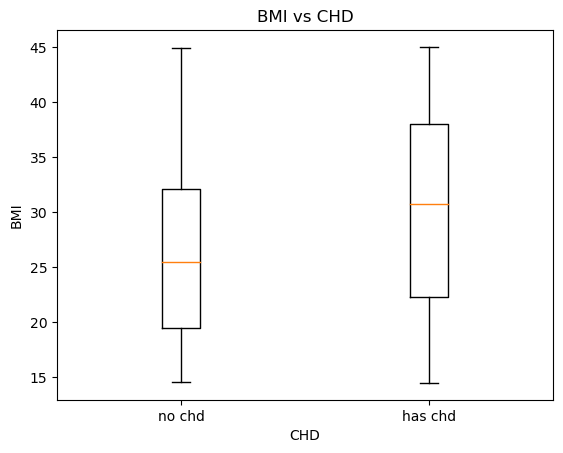

In [7]:
import matplotlib.pyplot as plt
plt.boxplot([disease_data["bmi"][disease_data["coronary_heart_disease"] == 0],
             disease_data["bmi"][disease_data["coronary_heart_disease"] == 1]])
plt.xticks([1, 2], ['no chd', 'has chd'])
plt.xlabel('CHD')
plt.ylabel('BMI')
plt.title('BMI vs CHD')
plt.show()

Does BMI alone have an effect on CHD? 

It does seem like people with lower BMI have a lower chance of having CHD, but not much lower!

There are lots of other useful plots that pyplot implements - I encourage you to use the documentation (https://matplotlib.org/stable/index.html), Google, and even ChatGPT to help with syntax if you're stuck, or just shoot me a message on Teams or come to my office hours! As we start to develop our own AI models we will cover new and more fancy methods of visualizing our inputs, outputs, and even some training statistics!